In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.metrics import confusion_matrix, classification_report

 Load dataset 


In [4]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# Image plotting function 
def plot_sample(X, y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
#Normalize data. Currently the pixel value is ranging from 0 - 255 that's why we need normalization
X_train = X_train / 255
X_test = X_test / 255

### Firstly we are going to build a Artificial Neural Network and then we will move on with the Convolution NN

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.3035 - loss: 1.9370
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.4207 - loss: 1.6489
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.4492 - loss: 1.5534
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4738 - loss: 1.4907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4929 - loss: 1.4441


In [14]:
# ann.evaluate(y_train, y_test)

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.71      0.53      1000
           1       0.61      0.61      0.61      1000
           2       0.36      0.36      0.36      1000
           3       0.40      0.23      0.30      1000
           4       0.47      0.34      0.39      1000
           5       0.52      0.24      0.33      1000
           6       0.40      0.74      0.52      1000
           7       0.58      0.55      0.56      1000
           8       0.65      0.54      0.59      1000
           9       0.58      0.52      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



The above classifiaction report indicates that the ANN algorithm is not predicting well on our data. 


## **Convolutional Neural Network**

- To set a CNN model, we first add our CNN layers and then the Dense layers.

- For the CNN layers, we need first a convolution layer which will categorize our features (It is the filters) into the feature maps and the a pooling layer which will reduce our features (Otherwise we end up with too many computations)

- For the CNN layer we need to specify the following : 

                    kernel_size = size of the filter
                    activation function = relu etc.
                    input shape (only for the first cnn layer)

- For the pooling layer :

                        - Pooling method (we use MaxPooling)
                        - the pool size and step (2,2)

                        

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # softmax gives a normalized propability in comparison to sigmoid. 
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.3751 - loss: 1.7083
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5963 - loss: 1.1477
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6542 - loss: 0.9867
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.6875 - loss: 0.8889
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7167 - loss: 0.8099
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7390 - loss: 0.7521
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7587 - loss: 0.6942
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7688 - loss: 0.6584
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7869 - loss: 0.6157
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7978 - loss: 0.5736


We can readly see that the accuracy of the cnn vs ann is much higher at least for the training data. 

In [22]:
cnn.evaluate(X_test, y_test) # Evaluate accuract on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6888 - loss: 0.9487


[0.9440563917160034, 0.6930999755859375]

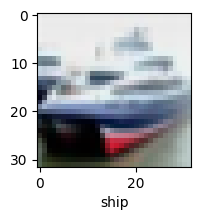

In [25]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)


In [26]:
# Predict all values 
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.85      0.79      0.82      1000
           2       0.66      0.49      0.56      1000
           3       0.57      0.40      0.47      1000
           4       0.57      0.72      0.63      1000
           5       0.56      0.67      0.61      1000
           6       0.74      0.80      0.77      1000
           7       0.71      0.77      0.74      1000
           8       0.84      0.77      0.80      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



The above classification report indicates that our accuracy increased from 0.48 to 0.69. Also f1-score and the rest of the statistics are optimized for the cnn. 